In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris= load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
data= pd.DataFrame(iris.data,columns= iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler= StandardScaler()
scaler.fit(data)
scaled_data= scaler.transform(data)

In [8]:
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
#Using Covariance Matrix
X_covariance_matrix= np.cov(scaled_data.T)
X_covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [10]:
eig_vals, eig_vecs= np.linalg.eig(X_covariance_matrix)
print('the eigen values are \n',eig_vals)
print(40*'-')
print('the eigen vectors are \n\n',eig_vecs)

the eigen values are 
 [2.93808505 0.9201649  0.14774182 0.02085386]
----------------------------------------
the eigen vectors are 

 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [11]:
#Using Correlation Coefficient matrix
X_covariance_matrix= np.corrcoef(scaled_data.T)
X_covariance_matrix
eig_vals, eig_vecs= np.linalg.eig(X_covariance_matrix)
print('the eigen values are \n',eig_vals)
print(40*'-')
print('the eigen vectors are \n\n',eig_vecs)

the eigen values are 
 [2.91849782 0.91403047 0.14675688 0.02071484]
----------------------------------------
the eigen vectors are 

 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [12]:
# Using Singular Value Decomposition 
u,s,v= np.linalg.svd(X_covariance_matrix)
print('the eigen values are \n',s)
print(40*'-')
print('the eigen vectors are \n\n',u)

the eigen values are 
 [2.91849782 0.91403047 0.14675688 0.02071484]
----------------------------------------
the eigen vectors are 

 [[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [-0.56485654 -0.06694199 -0.63427274  0.52359713]]


In [13]:
eig_pairs= [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key= lambda x:x[0],reverse= True)

for i in eig_pairs:
    print(i[0])

2.918497816531998
0.9140304714680693
0.1467568755713152
0.020714836428619095


In [14]:
eig_pairs

[(2.918497816531998,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9140304714680693,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1467568755713152,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020714836428619095,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

###### variance amount explained by each eigen vectior or PC is its corresponding eigen value...

In [15]:
tot= sum(eig_vals)
var_exp= [(i /tot)*100 for i in sorted(eig_vals, reverse =True)]
cum_var_exp= np.cumsum(var_exp)
print(' Varianve percentage captured by each\n', var_exp)
print(40*'-')
print('Cum variance explained by each\n', cum_var_exp)


 Varianve percentage captured by each
 [72.96244541329992, 22.85076178670172, 3.6689218892828785, 0.5178709107154771]
----------------------------------------
Cum variance explained by each
 [ 72.96244541  95.8132072   99.48212909 100.        ]


In [16]:
import pprint
print('All eigen values with eigen vectors')
pprint.pprint(eig_pairs)

#making matrix of selected eigen vectors
matrix_W= np.hstack((eig_pairs[0][1].reshape(4,1),
                   eig_pairs[1][1].reshape(4,1)))

print('\n\nMtrix W is \n\n',matrix_W)

All eigen values with eigen vectors
[(2.918497816531998,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9140304714680693,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1467568755713152,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020714836428619095,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]


Mtrix W is 

 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [17]:
#projecting original scaled values to eigen vectors
Y=scaled_data.dot(matrix_W)
print(Y.shape)

(150, 2)


In [18]:
#All four coordinates gets reduced to 2 coordinates
print(Y[0:5])

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


In [19]:
import pylab as pl

###### Score plot

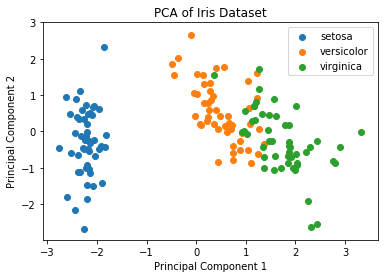

In [20]:
pl.figure()
target_names= iris.target_names
y= iris.target
for c, i, target_name in zip('rgb',[0,1,2],target_names):
    pl.scatter(Y[y==i,0],Y[y==i,1],label=target_name)
    
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('Score plot of Iris Dataset')
pl.show()

In [22]:
#Using Inbuilt SKLEARN MODULE
from sklearn.decomposition import PCA


In [23]:
pca= PCA()
pca.fit(scaled_data)

PCA()

In [24]:
pca_data=pca.transform(scaled_data)

In [25]:
# to check if same as before
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [26]:
#should be same as eigen values as before
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [27]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [36]:
pca.score(pca_data)

-14.931733763935659

In [31]:
loadings= pd.DataFrame(pca.components_.T, columns= ['PC1','PC2','PC3','PC4'], index= iris.feature_names)
loadings

,PC1,PC2,PC3,PC4
sepal length (cm),0.521066,0.377418,-0.719566,-0.261286
sepal width (cm),-0.269347,0.923296,0.244382,0.123510
petal length (cm),0.580413,0.024492,0.142126,0.801449
petal width (cm),0.564857,0.066942,0.634273,-0.523597


In [33]:
loadings_new= pca.components_.T* np.sqrt(pca.explained_variance_)

loading_matrix= pd.DataFrame(loadings_new, columns=['PC1','PC2','PC3','PC4'], index= iris.feature_names)
loading_matrix

,PC1,PC2,PC3,PC4
sepal length (cm),0.893151,0.362039,-0.276581,-0.037732
sepal width (cm),-0.461684,0.885673,0.093934,0.017836
petal length (cm),0.994877,0.023494,0.054629,0.115736
petal width (cm),0.968212,0.064214,0.243797,-0.075612


###### Loading Plot

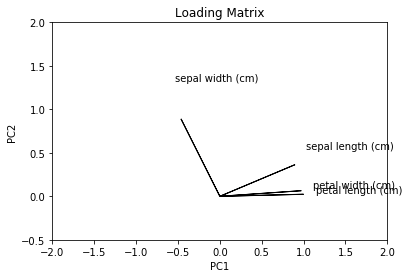

In [72]:
for i in range(loading_matrix.shape[0]):
    plt.arrow(0,0, loading_matrix.iloc[i,0], loading_matrix.iloc[i,1])
    plt.text(loading_matrix.iloc[i,0]*1.15, loading_matrix.iloc[i,1]*1.5, loading_matrix.index[i])
plt.xlim(-2,2)
plt.ylim(-0.5,2)
plt.title('Loading Matrix')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()    

###### Biplot

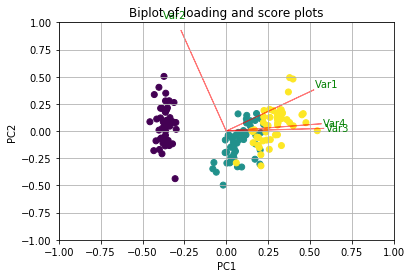

In [45]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs* scalex ,ys* scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title('Biplot of loading and score plots')
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca_data[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()


In [35]:
len(pca.explained_variance_ratio_)

4

In [40]:
import matplotlib.pyplot as plt

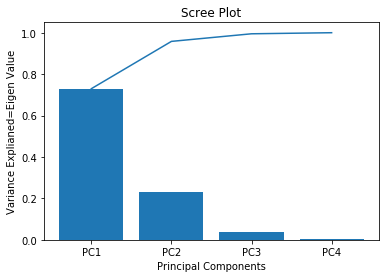

In [77]:
x=range(1,len(pca.explained_variance_ratio_)+1)
labels=['PC'+str(i) for i in range(1,len(pca.explained_variance_ratio_)+1) ]
plt.bar(x,pca.explained_variance_ratio_,label= labels)
cumsumvar=np.cumsum(pca.explained_variance_ratio_)
plt.plot(x,cumsumvar)

plt.xticks(range(1,5),labels)
plt.title('Scree Plot')
plt.ylabel('Variance Explianed=Eigen Value')
plt.xlabel('Principal Components')
plt.show()

###### Resources and references
https://learnche.org/pid/latent-variable-modelling/principal-component-analysis/interpreting-score-plots-and-loading-plots
https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/#:~:text=In%20summary%3A%20A%20PCA%20biplot,loadings%20of%20variables%20(vectors).&text=A%20scree%20plot%20displays%20how%20much%20variation,component%20captures%20from%20the%20data
https://people.orie.cornell.edu/mru8/doc/udell15_pca_dataframe.pdf

# Thanks!!

My two cents to your knowledge!!

Hoping you liked it, if you do tell me @codataliciouson Instagram